In [ ]:
"""
### Assignment

You will anaylize a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:
* Use Pandas to import the data from `epa-sea-level.csv`.
* Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
* Use the `linregress` function from `scipy.stats` to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
* Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
* The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

Unit tests are written for you under `test_module.py`.

### Development

For development, you can use `main.py` to test your functions. Click the "run" button and `main.py` will run.

### Testing 

We imported the tests from `test_module.py` to `main.py` for your convenience. 
The tests will run automatically whenever you hit the "run" button.

### Submitting

Copy your project's URL and submit it to freeCodeCamp.

### Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency 
using data from CSIRO, 2015; NOAA, 2015.
https://datahub.io/core/sea-level-rise


"""

In [48]:
import pandas as pd

In [49]:
df = pd.read_csv("/Users/ezequielpolacco/Desktop/Data Science/FreeCodeCamp/epa-sea-level.csv")

In [50]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [51]:
import matplotlib.pyplot as plt

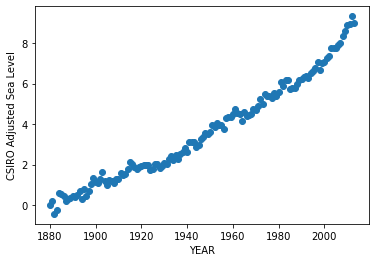

In [52]:
# Use matplotlib to create a scatter plot using the "Year" column as the x-axis and 
# the "CSIRO Adjusted Sea Level" column as the y-axix.
x = df["Year"]
y = df["CSIRO Adjusted Sea Level"]
plt.scatter(x, y)
plt.figsize=(20,12)
plt.xlabel("YEAR")
plt.ylabel("CSIRO Adjusted Sea Level")
plt.show()

In [53]:
# Use the `linregress` function from `scipy.stats` to get the slope and y-intercept of the line of best fit. 
# Plot the line of best fit over the top of the scatter plot. 
# Make the line go through the year 2050 to predict the sea level rise in 2050.

In [54]:
from scipy import stats
import seaborn as sns

LinregressResult(slope=0.06304458401213482, intercept=-119.06594196773983, rvalue=0.9847571311825853, pvalue=3.788696979107662e-102, stderr=0.000969211871328706, intercept_stderr=1.886943381242505)


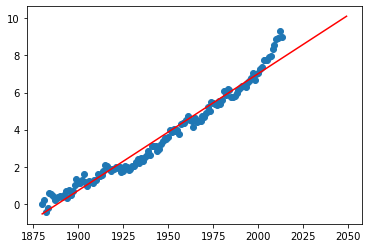

In [62]:
# Predict sea level in the year 2050
x = df["Year"]
y = df["CSIRO Adjusted Sea Level"]

res = stats.linregress(x, y)
print(res)
x_pred = pd.Series([i for i in range(1880, 2050)])
y_pred = res.slope * x_pred + res.intercept
plt.scatter(x, y)
plt.plot(x_pred, y_pred, "r")

LinregressResult(slope=0.06304458401213482, intercept=-119.06594196773983, rvalue=0.9847571311825853, pvalue=3.788696979107662e-102, stderr=0.000969211871328706, intercept_stderr=1.886943381242505)


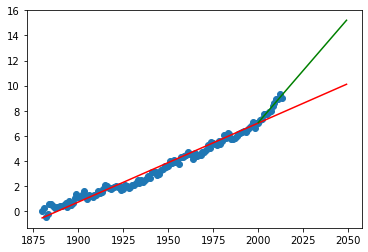

In [63]:
"""Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. 
Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as 
it has since the year 2000."""

df_nuevo = df.loc[df["Year"] >= 2000]
x_nuevo = df_nuevo["Year"]
y_nuevo = df_nuevo["CSIRO Adjusted Sea Level"]


res_nuevo = stats.linregress(x_nuevo, y_nuevo)
print(res)
x_pred_nuevo = pd.Series([i for i in range(2000, 2050)])
y_pred_nuevo = res_nuevo.slope * x_pred_nuevo + res_nuevo.intercept
plt.scatter(x, y)
plt.plot(x_pred, y_pred, "r")
plt.plot(x_pred_nuevo, y_pred_nuevo, "g")